## Machine Learning Online Class - Exercise 2: Logistic Regression
Requires : scipy, scikit-learn

### Introduction

In this exercise, you will implement logistic regression and apply it to two different datasets.<br><br>
Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. <br>
You have historical data from previous applicants that you can use as a training set for logistic regression. <br>
For each training example, you have the applicant's scores on two exams and the admissions decision.<br>
Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

### Python imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import axes3d

from scipy.optimize import minimize

from IPython.display import HTML

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

%matplotlib inline
rc('animation', html='html5')

### Load data

In [2]:
data = np.genfromtxt('ex2data1.txt',delimiter=',')

In [3]:
# Store data in X and y numpy arrays
X = np.c_[data[:,:2]]; y = np.c_[data[:,2]]

### Part 1 : Plotting

In [4]:
def plotData(X,y,x_label='',y_label='',neg_legend='',pos_legend=''):
    
    #Split between positive (y=1) and negative data(y=0)
    pos = X[np.where(y==1)[0]]
    neg = X[np.where(y==0)[0]]
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pos[:,0],pos[:,1], linestyle='None', marker='+', color='black', markersize=8, label=pos_legend)
    ax.plot(neg[:,0],neg[:,1], linestyle='None', marker='o', color='#d8ca04', markersize=8, label=neg_legend)
    ax.legend()
    return ax
    #plt.show()

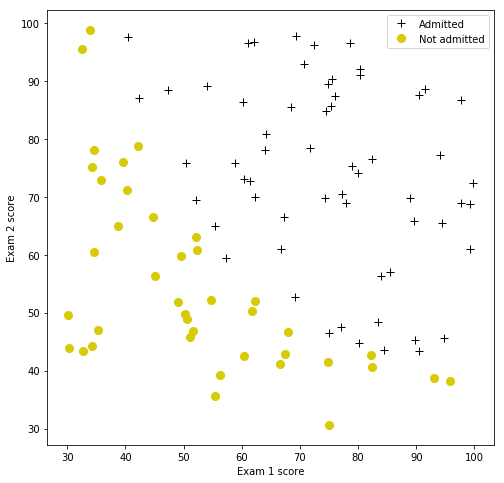

In [5]:
plotData(X,y, 'Exam 1 score', 'Exam 2 score', 'Not admitted', 'Admitted')

### Part 2: Compute Cost and Gradient

The logistic regression hypothesis is defined as :
$$ h_{\theta}(x) = g(\theta^Tx) $$
where the function gis the sigmoid function :
$$ g(z)=\frac{1}{1+e^{-z}} $$

In [6]:
(m,n) = np.shape(X)

In [7]:
# Add intercept
X = np.c_[np.ones(m),X]

In [8]:
# Initialize fitting params (1D-array)
initial_theta = np.zeros(n + 1).flatten()

#### Sigmoid function

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))    

#### Cost and gradient function

The cost function for logistic regression is defined as : 
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m [-y^{(i)}\log (h_{\theta}(x^{(i)}) - (1-y^{(i)})\log (1-h_{\theta}(x^{(i)}) ] $$
or in vectorized form :
$$ J(\theta) = \frac{1}{m} [-y^T\log(h) - (1-y^T)\log(1-h) ]$$

The gradient of the cost is :
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_j^{(i)})-y^{(i)})x_j^{(i)} $$
or in vectorized form :
$$ \frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T(h-y)$$

In [10]:
def costFunction(theta,X,y):
    
    m = len(y)
    
    theta = theta.reshape(-1,1) # Convert 1D to 2D vector (3,) to (3,1)
    
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h))) #--> (1,1) array
    grad = (1/m) * X.T.dot(h-y)    

    return np.asscalar(J),grad.flatten()

In [11]:
# Initial cost and gradient 
(cost,grad) = costFunction(initial_theta,X,y)
print("Cost at initial theta (zeros): {:2.3f} \n".format(cost))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): ')
print(' {}'.format(grad))
print('\n Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): 0.693 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 
 [ -0.1        -12.00921659 -11.26284221]

 Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [12]:
# Compute and display cost and gradient with non-zero theta

test_theta = np.array([-24, 0.2, 0.2])

(cost,grad) = costFunction(test_theta,X,y)
print("Cost at test theta: {:2.3f} \n".format(cost))
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: ')
print(' {}'.format(grad))
print('\n Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

Cost at test theta: 0.218 

Expected cost (approx): 0.218

Gradient at test theta: 
 [ 0.04290299  2.56623412  2.64679737]

 Expected gradients (approx):
 0.043
 2.566
 2.647



### Part 3  : optimizing using scipy built-in optimization functions

In [13]:
# Define 2 separate functions for cost and gradient

def cost(theta,X,y):
    
    m = len(y)
    
    theta = theta.reshape(-1,1) # Convert 1D to 2D vector (3,) to (3,1)
    
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h))) 

    return np.asscalar(J)

def grad(theta,X,y):
 
    m = len(y)
    
    theta = theta.reshape(-1,1) # Convert 1D to 2D vector (3,) to (3,1)
    
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h-y)    

    return grad.flatten()

#### Optimization

In [14]:
# Use scipy minimize
# Note that optim routine expects function to return a scalar, gradient to return a 1D array and x param to be a 1D array
find_optim_theta = minimize(fun=cost, x0=initial_theta, method = None, jac=grad, args = (X,y), options={'maxiter':400})
(theta_opt,cost_opt) = (find_optim_theta.x,find_optim_theta.fun)

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


In [15]:
print("Cost at theta found by minimize : {:3.3f}".format(cost_opt))

print("Expected cost : 0.203")
print("Theta = {}\n".format(theta_opt))
print("Expected theta : -25.161   0.206   0.201 ")

Cost at theta found by minimize : 0.203
Expected cost : 0.203
Theta = [-25.16133284   0.2062317    0.2014716 ]

Expected theta : -25.161   0.206   0.201 


#### Plot decision boundary

In [16]:
def plotDecisionBoundary(theta, X, y, x_label='',y_label='',neg_legend='',pos_legend=''):
    ax = plotData(X[:,1:],y, x_label, y_label, neg_legend, pos_legend)
    x_min = np.min(X[:,1]); x_max = np.max(X[:,1])
    y_min = np.min(X[:,2]); y_max = np.max(X[:,2])
    
    # Create 100*100 grid in [(x_min,x_max) x (y_min,y_max)]
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 
    
    # Evaluate h(theta*X) at each point in grid
    z = sigmoid(np.c_[np.ones(len(xx)*len(yy)),xx.ravel(),yy.ravel()].dot(theta.T)).reshape(len(xx),len(yy))
    
    # Plot decision boundaries (prob = 0.3,0.5,0.7)
    cp = plt.contour(xx,yy,z,[0.3,0.5,0.7], linewidths=2, colors='r')  
    ax.clabel(cp)
    
    

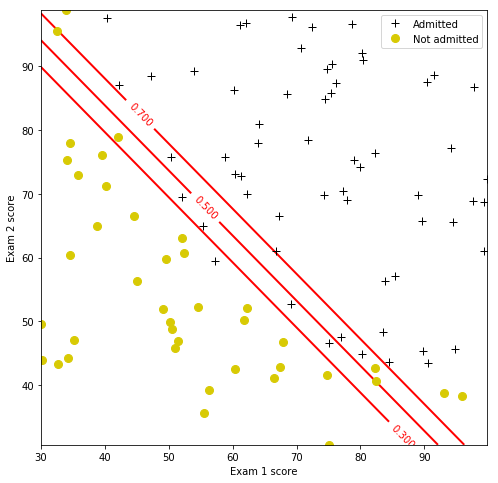

In [17]:
plotDecisionBoundary(theta_opt, X, y,'Exam 1 score', 'Exam 2 score', 'Not admitted', 'Admitted' )

### Part 3 - Prediction and accuracy

#### Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 

In [18]:
prob = sigmoid(np.array([1,45,85]).dot(theta_opt.T))

In [19]:
print("For a student with score 45 on exam 1 and score 85 on exam 2, \
        we predict an admission prob of {:3.2f} %".format(prob * 100))

print("Expected value: 77.5 +/- 0.2%\n\n")

For a student with score 45 on exam 1 and score 85 on exam 2,         we predict an admission prob of 77.63 %
Expected value: 77.5 +/- 0.2%




#### Compute accuracy on the training set

In [20]:
def predict(theta,X):    
    #Ensure inputs are arrays
    X = np.array(X) 
    theta = np.array(theta)
    return (sigmoid(X.dot(theta.T))>=0.5).astype('int').reshape(-1,1) #True/False to 1/0

In [21]:
p=predict(theta_opt,X)

In [22]:
print("Train Accuracy : {:2.1f} %".format(100 * np.sum((p==y).astype('int') /m)))
print("Expected accuracy (approx) : 89.0% ")

Train Accuracy : 89.0 %
Expected accuracy (approx) : 89.0% 


### Comparison with sklearn logistic regression

In [23]:
data = np.genfromtxt('ex2data1.txt',delimiter=',')

In [24]:
X = np.c_[data[:,:2]]; y = np.c_[data[:,2]].ravel()

In [25]:
lr = LogisticRegression(max_iter=400, intercept_scaling=0,solver='newton-cg')

In [26]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=0, max_iter=400, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
theta_sk = np.c_[lr.intercept_, lr.coef_]

In [28]:
print(theta_sk)

[[-25.05200379   0.2053533    0.20058239]]


In [29]:
p_sk = lr.predict(X)

In [30]:
print("Train Accuracy : {:2.1f} %".format(100 * np.sum((lr.predict(X)==y).astype('int') /m)))

Train Accuracy : 89.0 %


## Regularized logistic regression

### Import data

In [31]:
data = np.genfromtxt('ex2data2.txt',delimiter=',')

In [32]:
X = data[:,:2]; y = data[:,2].reshape(-1,1)

### Plot data

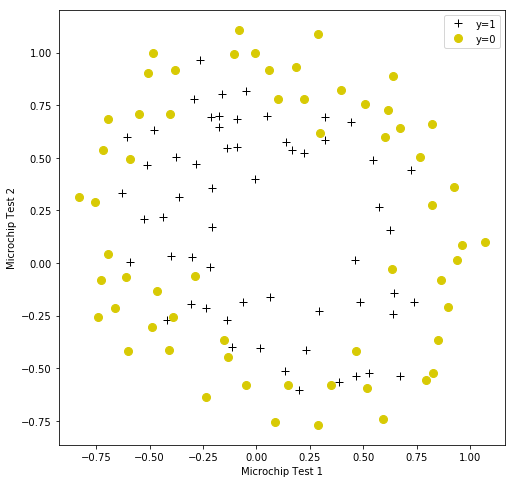

In [33]:
plotData(X,y, 'Microchip Test 1', 'Microchip Test 2' ,'y=0','y=1')

#### Add polynomial features

In [34]:
# Use sklearn PolynomialFeatures class
poly = PolynomialFeatures(6) #creates an instance of degree 6
X = poly.fit_transform(X) #transforms X, intercept is added by default

In [35]:
# Initialize theta
(m,n) = np.shape(X)
initial_theta = np.zeros(n).flatten()

In [36]:
# Set regularization parameter
lambda_reg = 1

#### Cost & gradient functions with regularization

The regularized cost function for logistic regression is defined as : 
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m [-y^{(i)}\log (h_{\theta}(x^{(i)}) - (1-y^{(i)})\log (1-h_{\theta}(x^{(i)}) ] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2 $$
or in vectorized form :
$$ J(\theta) = \frac{1}{m} [-y^T\log(h) - (1-y^T)\log(1-h) ] + \frac{\lambda}{2m}\theta^T\theta $$

The gradient of the regularized cost function is :
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_j^{(i)})-y^{(i)})x_j^{(i)},j=0$$ 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m (h_{\theta}(x_j^{(i)})-y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j ,j>0$$
or in vectorized form :
$$ \left(\frac{\partial J(\theta)}{\partial \theta}\right)_0 = \left(\frac{1}{m} X^T(h-y)\right)_0$$
$$ \left(\frac{\partial J(\theta)}{\partial \theta}\right)_{j>0} = \left(\frac{1}{m} X^T(h-y)+\frac{\lambda}{m}\theta \right)_{j>0}$$

In [37]:
def costFunctionReg(theta,X,y,lambda_reg):
    m = len(y)
    
    theta = theta.reshape(-1,1)
    
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h))-(1-y).T.dot(np.log(1-h))) + (lambda_reg /(2 * m)) * np.sum(theta[1:,:]**2) 
    
    return np.asscalar(J)

In [38]:
def gradFunctionReg(theta,X,y,lambda_reg):
    m = len(y)
    theta = theta.reshape(-1,1)
    
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h-y)
    grad[1:,:] = grad[1:,:] + (lambda_reg / m) * theta[1:,:]

    return grad.flatten()

In [39]:
#Testing

print("Cost at initial theta (zeros) with lambda = 1 : {:2.3f}".format(costFunctionReg(initial_theta,X,y,1)))
print("Expected cost : 0.693 \n")
np.set_printoptions(4,suppress=True)
print("Gradient at initial theta (zeros) with lambda = 1 : \n {} \n".format(gradFunctionReg(initial_theta,X,y,1)[:5].reshape(5,1)))
np.set_printoptions()
print("Expected gradient (first five values) :\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n\n")


Cost at initial theta (zeros) with lambda = 1 : 0.693
Expected cost : 0.693 

Gradient at initial theta (zeros) with lambda = 1 : 
 [[ 0.0085]
 [ 0.0188]
 [ 0.0001]
 [ 0.0503]
 [ 0.0115]] 

Expected gradient (first five values) :
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115




In [40]:
# Further testing
      
test_theta = np.ones(n)
      
print("Cost at test theta with lambda = 10 : {:2.3f}".format(costFunctionReg(test_theta,X,y,10)))
print("Expected cost : 3.16 \n")
np.set_printoptions(4,suppress=True)
print("Gradient at test theta with lambda = 10 : \n {} \n".format(gradFunctionReg(test_theta,X,y,10)[:5].reshape(5,1)))
np.set_printoptions()
print("Expected gradient (first five values) :\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n\n")  

Cost at test theta with lambda = 10 : 3.165
Expected cost : 3.16 

Gradient at test theta with lambda = 10 : 
 [[ 0.346 ]
 [ 0.1614]
 [ 0.1948]
 [ 0.2269]
 [ 0.0922]] 

Expected gradient (first five values) :
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922




#### Optimization (lambda = 1)

In [41]:
find_optim_theta_reg = minimize(fun=costFunctionReg, x0=initial_theta,
method = None, jac=gradFunctionReg, args = (X,y,1), options={'maxiter':400})
(theta_opt,cost_opt) = (find_optim_theta.x,find_optim_theta.fun)

In [42]:
theta_reg_opt = find_optim_theta_reg.x

### Plot decision boundary

In [43]:
# Review function to account for polynomial features
def plotDecisionBoundaryMulti(theta, X, y, x_label='',y_label='',neg_legend='',pos_legend=''):
    ax = plotData(X[:,1:],y, x_label, y_label, neg_legend, pos_legend)
    x_min = np.min(X[:,1]); x_max = np.max(X[:,1])
    y_min = np.min(X[:,2]); y_max = np.max(X[:,2])
    
    # Create 100*100 grid in [(x_min,x_max) x (y_min,y_max)]
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 
    
    # Evaluate h(theta*X) at each point in grid
    
    z = sigmoid(poly.fit_transform(np.c_[xx.ravel(),yy.ravel()]).dot(theta.T)).reshape(len(xx),len(yy))    
    
    # Plot decision boundaries (prob = 0.3,0.5,0.7)
    cp = plt.contour(xx,yy,z,[0.5], linewidths=2, colors='r')  
    ax.clabel(cp)

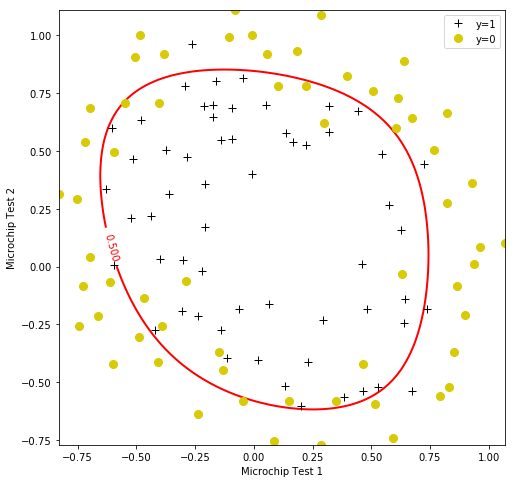

In [44]:
plotDecisionBoundaryMulti(theta_reg_opt, X, y,'Microchip Test 1', 'Microchip Test 2' ,'y=0','y=1' )

#### Lambda = 0

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


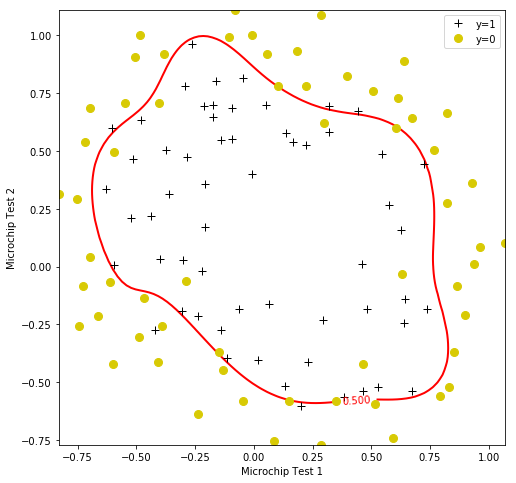

In [45]:
find_optim_theta_reg = minimize(fun=costFunctionReg, x0=initial_theta,
method = None, jac=gradFunctionReg, args = (X,y,0), options={'maxiter':400})
(theta_opt,cost_opt) = (find_optim_theta.x,find_optim_theta.fun)

theta_reg_opt = find_optim_theta_reg.x

plotDecisionBoundaryMulti(theta_reg_opt, X, y,'Microchip Test 1', 'Microchip Test 2' ,'y=0','y=1' )

#### Lambda = 100

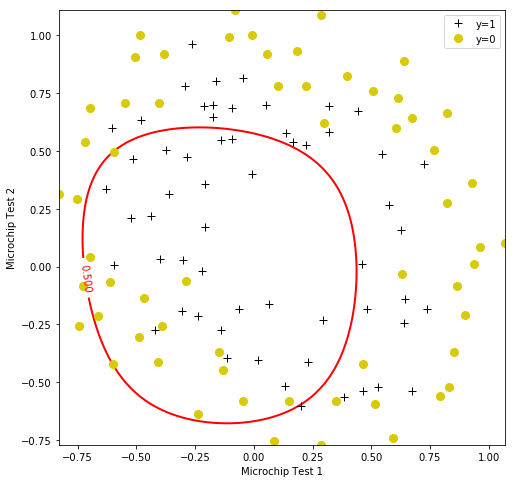

In [46]:
find_optim_theta_reg = minimize(fun=costFunctionReg, x0=initial_theta,
method = None, jac=gradFunctionReg, args = (X,y,100), options={'maxiter':400})
(theta_opt,cost_opt) = (find_optim_theta.x,find_optim_theta.fun)

theta_reg_opt = find_optim_theta_reg.x

plotDecisionBoundaryMulti(theta_reg_opt, X, y,'Microchip Test 1', 'Microchip Test 2' ,'y=0','y=1' )

### Check accuracy on training samples

In [47]:
# Reverting to lambda = 1
find_optim_theta_reg = minimize(fun=costFunctionReg, x0=initial_theta,
method = None, jac=gradFunctionReg, args = (X,y,1), options={'maxiter':400})
(theta_opt,cost_opt) = (find_optim_theta.x,find_optim_theta.fun)

theta_reg_opt = find_optim_theta_reg.x

In [48]:
p = predict(theta_reg_opt,X)

In [49]:
print("Train Accuracy : {:2.1f} %".format(100 * np.sum((p==y).astype('int') /m)))
print("Expected accuracy (approx) : 83.1% ")

Train Accuracy : 83.1 %
Expected accuracy (approx) : 83.1% 


### END